In [3]:
%store -r trainX
%store -r testX
%store -r trainY
%store -r testY
%store -r valX
%store -r valY
%store -r le

In [38]:
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D,Input
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN,Embedding
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


## RNN (keras)

In [8]:
s=100
batch_size = 20
epochs = 50

NameError: name 'Embedding' is not defined

In [39]:
model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=trainX,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'training_length' is not defined

In [32]:
model.compile(optimizer = 'adam',
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy']
             )

In [33]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         256000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 256)         131328    
_________________________________________________________________
gru_10 (GRU)                 (None, 128)               148224    
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 516       
Total params: 536,068
Trainable params: 536,068
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

In [35]:
CNNmodel = model.fit(trainX,
                     trainY, 
                     epochs=epochs,
                     callbacks = [early_stopping],
                     validation_data = (valX,valY),
                     batch_size=batch_size,
                     verbose=1
)

Epoch 1/50


ValueError: in user code:

    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:660 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ritesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer simple_rnn_11 is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (None, 100, 100, 3, 256)


In [49]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



Test Loss is 0.6939255595207214
Test Accuracy is 0.7561837434768677


In [50]:
modelLoss, modelAccuracy = model.evaluate(trainX, trainY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



Test Loss is 0.15606501698493958
Test Accuracy is 0.9578713774681091


In [51]:
# classification report on train
predIdxs = model.predict(trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.92025   0.99338   0.95541       151
Lung Opacity    0.99145   0.90625   0.94694       256
      Normal    0.95078   0.97032   0.96045       438
   Pneumonia    0.98276   1.00000   0.99130        57

    accuracy                        0.95787       902
   macro avg    0.96131   0.96749   0.96353       902
weighted avg    0.95923   0.95787   0.95772       902



In [52]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.62295   0.77551   0.69091        49
Lung Opacity    0.75000   0.63750   0.68919        80
      Normal    0.81295   0.83088   0.82182       136
   Pneumonia    0.80000   0.66667   0.72727        18

    accuracy                        0.75618       283
   macro avg    0.74648   0.72764   0.73230       283
weighted avg    0.76143   0.75618   0.75565       283



In [100]:
class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[11])])

Covid-19


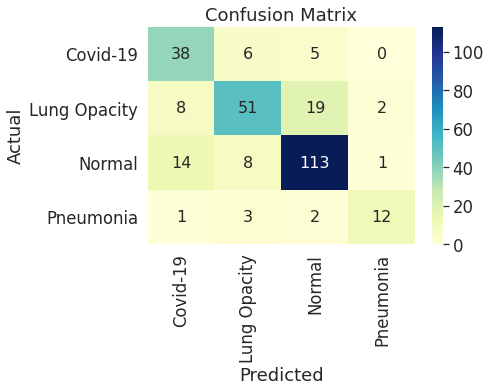

In [91]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

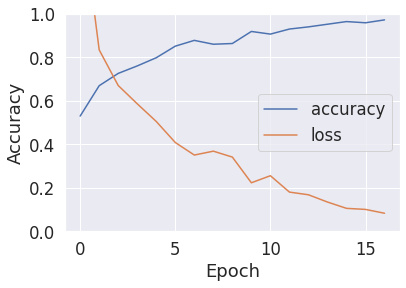

In [92]:
plt.plot(CNNmodel.history['accuracy'], label='accuracy')
plt.plot(CNNmodel.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')


In [93]:
model.save('CNN_Covid19_Xray_V1.h5') 

{'loss': [1.514467716217041,
  0.8342658877372742,
  0.6704695224761963,
  0.5863805413246155,
  0.505073606967926,
  0.40840470790863037,
  0.3506659269332886,
  0.36854058504104614,
  0.34131017327308655,
  0.22318337857723236,
  0.2556394040584564,
  0.18033254146575928,
  0.16795501112937927,
  0.13456207513809204,
  0.10557879507541656,
  0.10065620392560959,
  0.08303774893283844],
 'accuracy': [0.5299334526062012,
  0.669623076915741,
  0.7261641025543213,
  0.7605321407318115,
  0.7982261776924133,
  0.8514412641525269,
  0.8780487775802612,
  0.860310435295105,
  0.8636363744735718,
  0.9190687537193298,
  0.9068736433982849,
  0.9301552176475525,
  0.9401330351829529,
  0.9523281455039978,
  0.9645232558250427,
  0.9589800238609314,
  0.9722838401794434],
 'val_loss': [1.3209517002105713,
  1.141831398010254,
  1.0429624319076538,
  0.9159674048423767,
  0.9096826910972595,
  0.7562195062637329,
  0.6973408460617065,
  0.952737033367157,
  0.6713815927505493,
  0.708631336688

In [99]:
le.classes_

array(['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia'], dtype='<U12')